In [18]:
import yfinance as yf
import pandas as pd

def get_short_rate_data(ticker='^IRX', start='2015-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    # Use 'Close' if 'Adj Close' is not present
    if 'Adj Close' in data.columns:
        data = data['Adj Close'] / 100
    elif 'Close' in data.columns:
        data = data['Close'] / 100
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' found in data columns: " + str(data.columns))
    data = data.dropna()
    data.name = "ShortRate"
    return data

In [19]:

# Download the data
rate_data = get_short_rate_data()

# Print the first 10 rows
print(rate_data.head(10))

# Print data info (optional)
print("\nData Info:")
print(rate_data.describe())


[*********************100%***********************]  1 of 1 completed

Ticker         ^IRX
Date               
2015-01-02  0.00015
2015-01-05  0.00003
2015-01-06  0.00020
2015-01-07  0.00020
2015-01-08  0.00018
2015-01-09  0.00015
2015-01-12  0.00013
2015-01-13  0.00023
2015-01-14  0.00025
2015-01-15  0.00023

Data Info:
Ticker         ^IRX
count   2514.000000
mean       0.017559
std        0.018658
min       -0.001050
25%        0.001100
50%        0.010540
75%        0.023880
max        0.053480


[*********************100%***********************]  1 of 1 completed


<Figure size 1000x500 with 0 Axes>

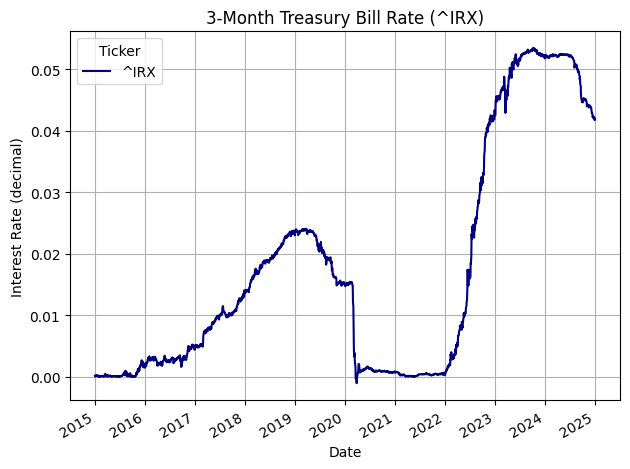

In [ ]:
import matplotlib.pyplot as plt

# Download data
rate = get_short_rate_data()

# Plot
plt.figure(figsize=(10, 5))
rate.plot(title="3-Month Treasury Bill Rate (^IRX)", color='navy')
plt.ylabel("Interest Rate (decimal)")
plt.grid(True)
plt.tight_layout()
plt.show()